In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
df = pd.read_csv("Customer.csv")

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
df = df.drop('CustomerID', axis=1)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [28]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [29]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

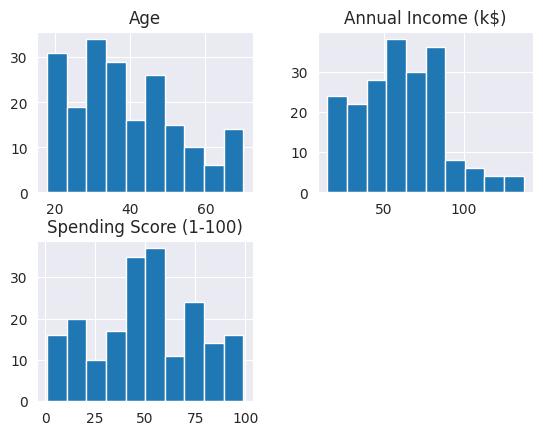

In [30]:
df.hist()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

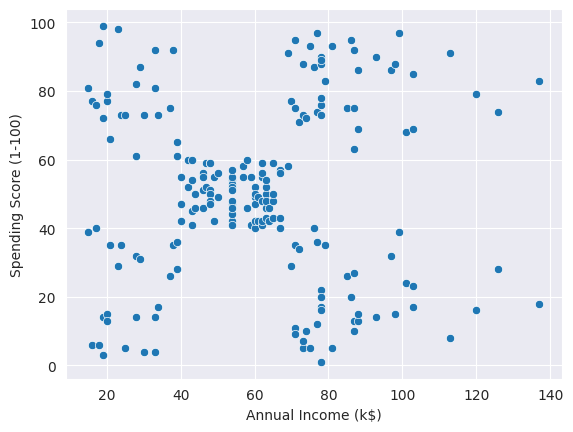

In [31]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

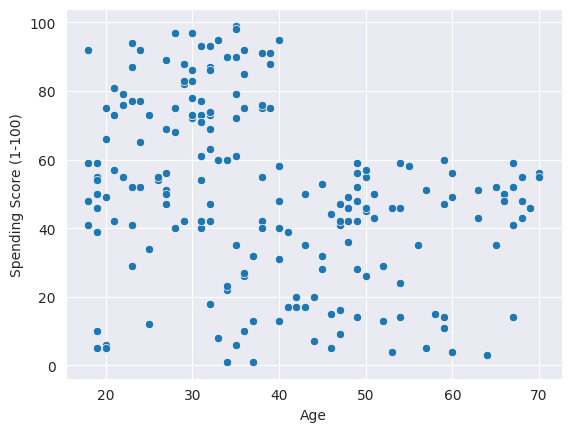

In [32]:
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=df)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

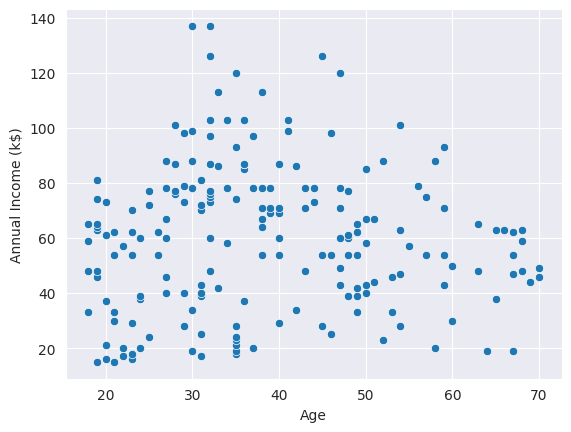

In [33]:
sns.scatterplot(x="Age", y="Annual Income (k$)", data=df)

<Axes: ylabel='Age'>

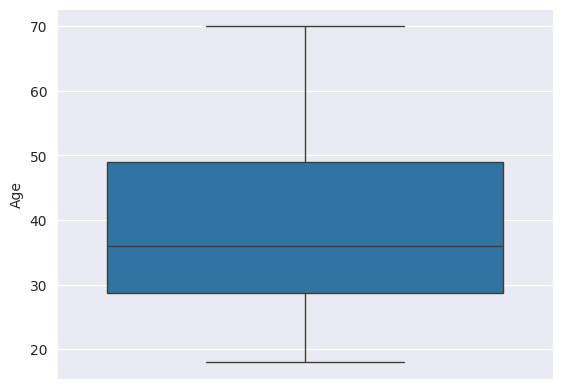

In [34]:
sns.boxplot(df["Age"])

<Axes: ylabel='Annual Income (k$)'>

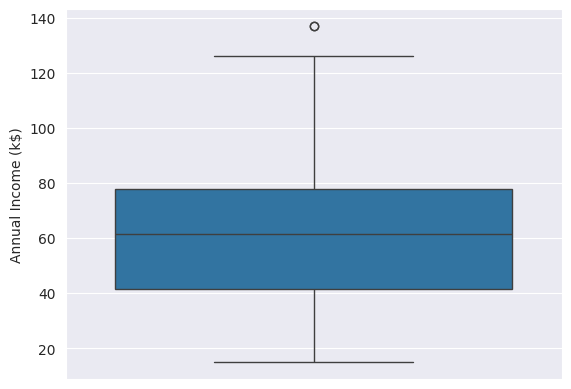

In [35]:
sns.boxplot(df["Annual Income (k$)"])

<Axes: ylabel='Spending Score (1-100)'>

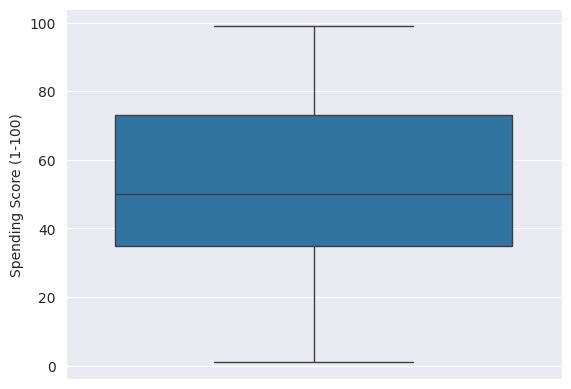

In [36]:
sns.boxplot(df["Spending Score (1-100)"])

<Axes: >

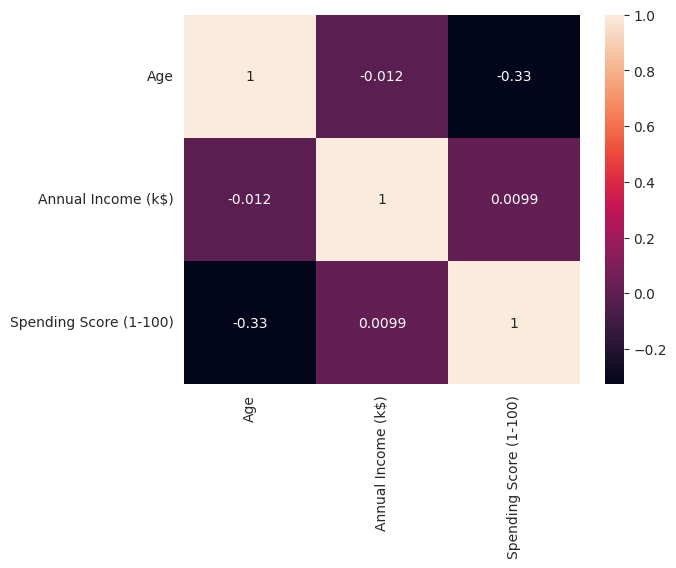

In [37]:
data = df.drop('Gender' , axis=1)
sns.heatmap(data.corr() , annot=True)

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [39]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop('Gender', axis=1))


In [50]:
pca = PCA(n_components=2)  
data_pca = pca.fit_transform(data_scaled)

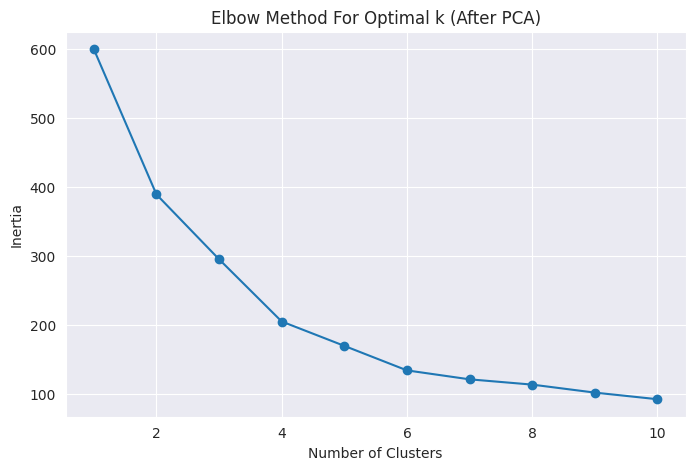

In [47]:
inertia = []
for n in range(1, 11):  
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (After PCA)')
plt.show()


In [48]:
optimal_k = 4  # replace with the optimal number of clusters found
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_pca)


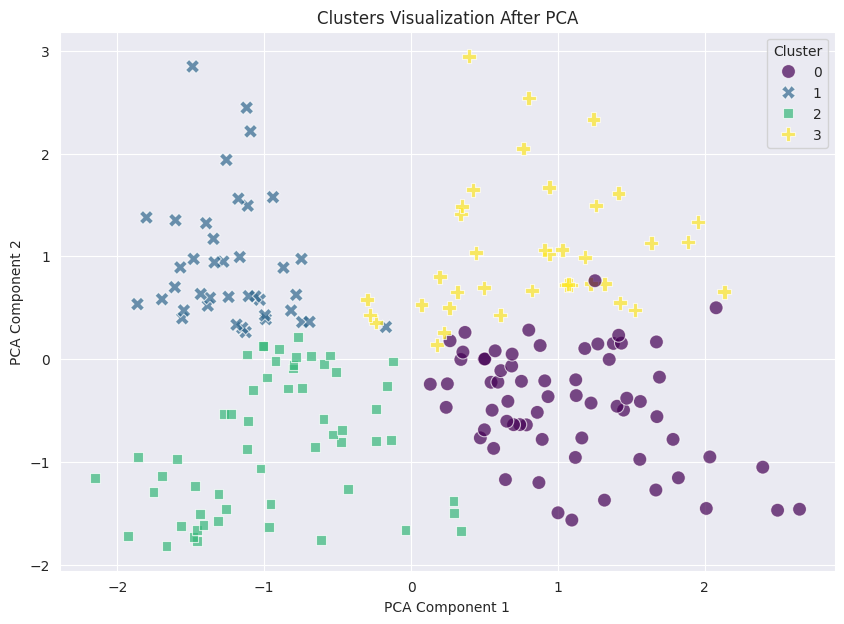

In [49]:
plt.figure(figsize=(10, 7))

sns.scatterplot(
    x=data_pca[:, 0],       
    y=data_pca[:, 1],       
    hue=clusters,           
    palette='viridis',      
    style=clusters,         
    s=100,                  
    alpha=0.7              
)

plt.title('Clusters Visualization After PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')

plt.show()

In [59]:
silhouette_avg = silhouette_score(data_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.31815011071318283


In [54]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [55]:
n_clusters = 5  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data)

In [56]:
df['Cluster'] = clusters


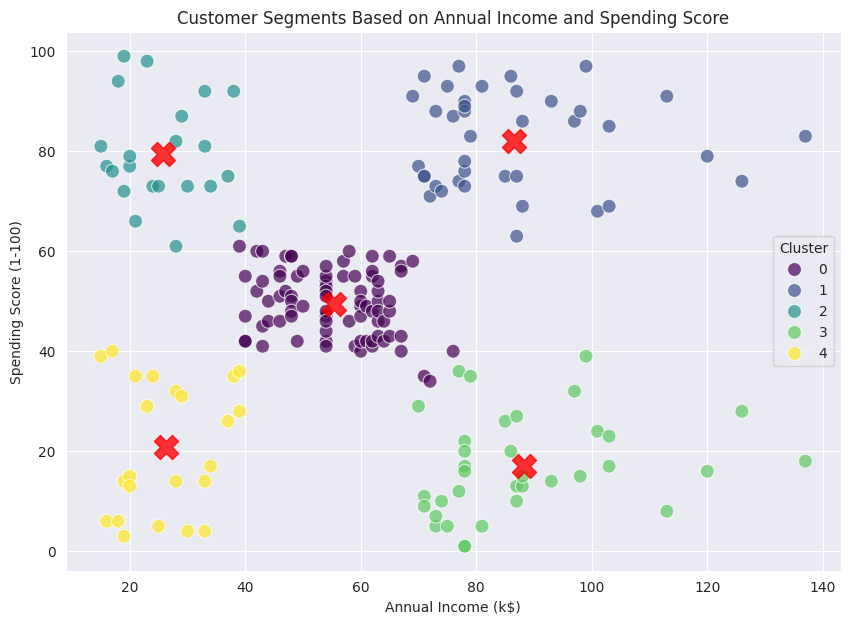

In [57]:
plt.figure(figsize=(10, 7))

# Create a scatter plot
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',           
    palette='viridis',       
    data=df,                  
    s=100,                    
    alpha=0.7                 
)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8, marker='X')

# Labeling the plot
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')

# Show plot
plt.show()

In [58]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.553931997444648
